<h1><center><font color = "red"> Progetto Python con Pandas - Food </font></center></h1>
<h2><center> Analisi del Dataset "Wine Reviews" </center><h2>

<img src = "https://www.cantinedidolianova.it/wp-content/uploads/2020/01/Tipi-di-vino.jpg">

<h1> Obiettivo: </h1>
<p> In questo notebook andremo ad indagare le caratteristiche principali del Dataset "Wine Reviews". </p>
<p> In particolare, creeremo una strategia per l'assortimento iniziale del nostro marketplace di vini, pensata sulla base di: Paese di provenienza, prezzo, recensioni e cantina produttrice dei vini presi in considerazione. </p>
<h1> Roadmap dell'analisi: </h1>
<ol>
    <li> Esplorazione e pulizia del Dataset </li> 
    <li> Analisi delle variabili prese singolarmente </li> 
    <li> Analisi delle variabili correlate tra loro </li> 
    <li> Strategia per selezionare i vini da inserire nel marketplace </li> 
</ol>
    


<h1> 1. Esplorazione e pulizia del Dataset: </h1>
<p> In questa prima fase, andremo a: importare le librerie da utilizzare, importare e visualizzare il Dataset, gestire le criticità che potrebbero insorgere durante la nostra analisi (record duplicati, valori nulli e tipi di dato non coerenti con i valori effettivamente osservati) e, infine, vedremo un descrizione sintetica dei dati, in modo da avere una panoramica generale degli stessi. </p>

In [1]:
# Importazione delle librerie per l'analisi del df e per la realizzazione dei grafici

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Caricamento e visualizzazione del df

df = pd.read_csv('dataset_vini.csv')
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [3]:
# Verificare la persenza o meno di dati duplicati nel df

df.duplicated().sum()

0

In [4]:
# Conteggio dei valori nulli da gestire

df.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

<p> Ci sono molti valori nulli, quindi è necessario correggerli nel modo più opportuno per non alterare l'analisi che faremo. </p>

In [5]:
# Eliminazione delle colonne che non utilizzerò nell'analisi

df.drop(columns = ['Unnamed: 0', 'designation', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle'], inplace = True)

In [6]:
# Eliminazione dei record nulli rimanenti

df.dropna(subset = ['country', 'price', 'variety'], inplace=True)

In [7]:
# Verificare che non ci siano più valori nulli nel nostro df

df.isnull().sum()

country        0
description    0
points         0
price          0
title          0
variety        0
winery         0
dtype: int64

In [8]:
# Controllare che i tipi di dato presenti nel df siano coerenti con i valori osservati

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120915 entries, 1 to 129970
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120915 non-null  object 
 1   description  120915 non-null  object 
 2   points       120915 non-null  int64  
 3   price        120915 non-null  float64
 4   title        120915 non-null  object 
 5   variety      120915 non-null  object 
 6   winery       120915 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 7.4+ MB


In [9]:
# Controllo del numero delle righe e delle colonne presenti nel df dopo questi interventi

df.shape

(120915, 7)

In [10]:
# Visualizzazione del df pulito su cui andremo a eseguire l'analisi

df

,country,description,points,price,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,90,75.0,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,90,30.0,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [11]:
# Visualizzazione sintetica delle principali caratteristiche

df.describe(include = 'all')

,country,description,points,price,title,variety,winery
count,120915,120915,120915.000000,120915.000000,120915,120915,120915
unique,42,111511,NaN,NaN,110582,691,15843
top,US,"Ripe plum, game, truffle, leather and menthol ...",NaN,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Testarossa
freq,54265,3,NaN,NaN,11,12785,217
mean,NaN,NaN,88.421726,35.368796,NaN,NaN,NaN
std,NaN,NaN,3.044954,41.031188,NaN,NaN,NaN
min,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN
25%,NaN,NaN,86.000000,17.000000,NaN,NaN,NaN
50%,NaN,NaN,88.000000,25.000000,NaN,NaN,NaN
75%,NaN,NaN,91.000000,42.000000,NaN,NaN,NaN


<p> Da questa visualizzazione possiamo notare che i valori dei quartili di 'points' e 'price' sono molto interessanti. Per questo, andiamo a vedere come si distribuiscono le osservazioni utilizzando il box plot. </p>

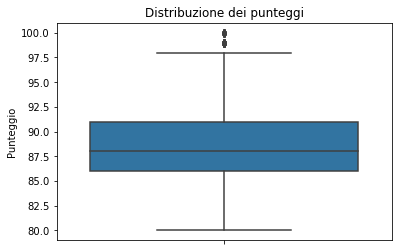

In [12]:
sns.boxplot(y = df["points"])
plt.title('Distribuzione dei punteggi')
plt.ylabel('Punteggio')
plt.show()

<p> Per quanto riguarda i punteggi, la metà dei vini sono stati recensiti con una valutazione compresa tra 86 e 91; in particolare, c'è una concentrazione delle osservazioni piuttosto elevata tra i punteggi che vanno da 86 a 88. Il punteggio minimo è di 80 e il massimo è di 100 ed è evidente la presenza di alcuni outlier. Successivamente, quando analizzeremo questa variabile, avremo altre informazioni nel dettaglio. </p>

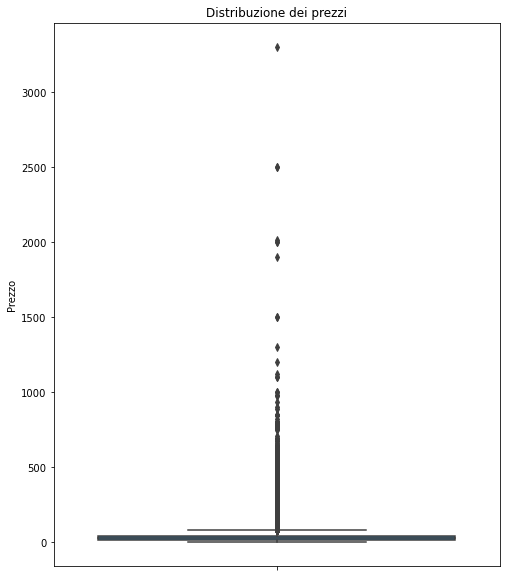

In [13]:
plt.figure(figsize = (8, 10))
sns.boxplot(y = df["price"])
plt.title('Distribuzione dei prezzi')
plt.ylabel('Prezzo')
plt.show()

<p> Per quanto riguarda i prezzi, la metà dei vini ha un prezzo compreso tra 25 e 42. Il prezzo minimo è di 17 e il massimo è di 3300 ed è evidente la presenza di numerosi outlier. Pertanto, la distribuzione delle osservazioni non è omogenea, ma, al contrario, c'è una concentrazione molto elevata in corrispondenza i prezzi più bassi, che analizzeremo successivamente. </p>

<h1> 2. Analisi delle variabili prese singolarmente: </h1>
<p> In questa fase, andremo ad analizzare le variabili in esame, seguendo questi punti di riferimento: 
    <ul>
        <li> Quanti sono i Paesi presi in considerazione e quali sono i maggiori produttori </li>
        <li> La media dei punteggi assegnati e la loro distribuzione </li>
        <li> La media dei prezzi dei vini e la loro distribuzione </li>
        <li> Quali sono le varietà di vino e le cantine più amate </li>
    </ul>
    La finalità è quella di cercare i punti di riferimento per procedere nella nostra analisi.
</p>

Numero totale dei Paesi analizzati: 42


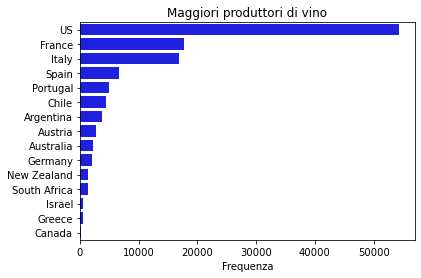

In [14]:
# Conteggio dei Paesi presenti nel df
# Grafico a barre per evidenziare i 15 Paesi che producono più vino

print('Numero totale dei Paesi analizzati:', df['country'].nunique())

var_country = df['country'].value_counts().to_frame().head(15)

sns.barplot(x = var_country['country'], y = var_country.index, data = var_country, color = 'blue')
plt.title('Maggiori produttori di vino')
plt.xlabel('Frequenza')
plt.show()

<p> Da questo grafico emerge che i più grandi produttori di vino siano principalmente gli States, la Francia e l'Italia. </p>
<p> Questa informazione ci tornerà utile successivamente; quando, nella parte finale della terza fase, andremo a individuare i Paesi di provenienza più gettonati, ovvero i maggiori produttori di vino che abbiano un punteggio medio relativamente alto. </p>

Punteggio medio dei vini: 88.42


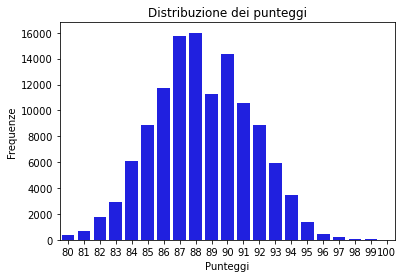

In [15]:
# Media dei punteggi assegnati ai vini
# Grafico a barre per evidenziare la distribuzione dei punteggi

print('Punteggio medio dei vini:', round(df['points'].mean(), 2))

var_points = df['points'].value_counts().to_frame()

sns.barplot(x = var_points.index, y = var_points['points'], data = var_points, color = 'blue')
plt.title('Distribuzione dei punteggi')
plt.xlabel('Punteggi')
plt.ylabel('Frequenze')
plt.show()

<p> Da questo grafico emerge che la distribuzione è piuttosto omogenea e (come abbiamo visto dal box plot) c'è una concentrazione delle osservazione maggiore di punteggi che vanno da 86 a 88. </p>
<p> Inoltre, l'informazione sui riguardante il punteggio medio ci tornerà utile per decidere quali Paesi di provenienza selezionare. In quanto sceglieremo gli Stati che abbiano una media non inferiore a quella generale e, tra questi, andremo a selezionare i vini con punteggi eccellenti. </p>

Prezzo medio dei vini: 35.37


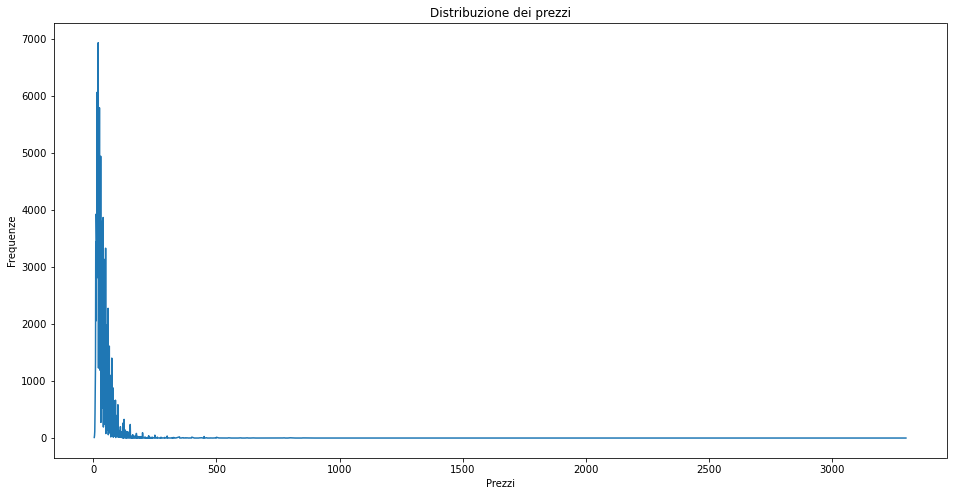

In [16]:
# Media dei prezzi dei vini
# Grafico per evidenziare la distribuzione dei prezzi

print('Prezzo medio dei vini:', round(df['price'].mean(), 2))

var_price = df['price'].value_counts().to_frame()

plt.figure(figsize = (16, 8))
sns.lineplot(x = var_price.index, y = var_price['price'], data = var_price)
plt.title('Distribuzione dei prezzi')
plt.xlabel('Prezzi')
plt.ylabel('Frequenze')
plt.show()

<p> Dal grafico emerge che l'andamento della distribuzione dei prezzi è molto disomogeneo e che i prezzi più ricorrenti si aggirano attorno all'intervallo 0 - 200 (come già intuito dal box plot); pertanto, per osservare più da vicino questa parte della distribuzione ho realizzato nella cella successiva un grafico che rendesse più visibile questo aspetto. </p>

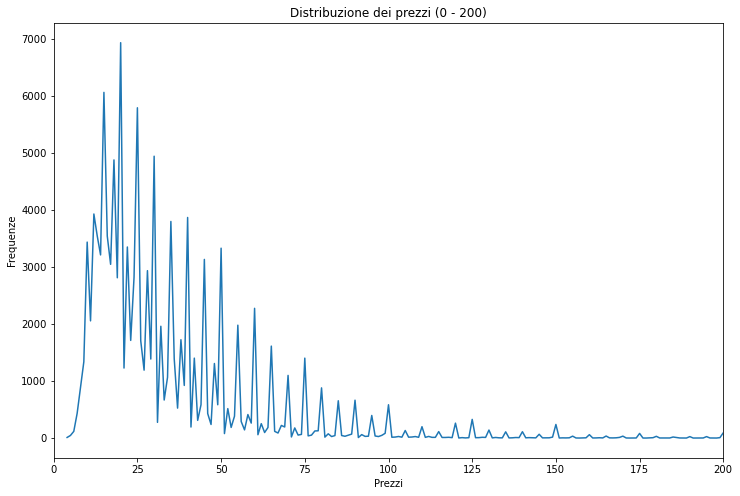

In [17]:
# Grafico per evidenziare la distribuzione dei prezzi (da 0 a 200)

plt.figure(figsize = (12, 8))
sns.lineplot(x = var_price.index, y = var_price['price'], data = var_price)
plt.xlim(0, 200)
plt.title('Distribuzione dei prezzi (0 - 200)')
plt.xlabel('Prezzi')
plt.ylabel('Frequenze')
plt.show()

<p> Con l'intervallo sull'asse delle x ridotto è più comprensibile l'andamento della distribuzione dei prezzi rispetto al grafico precedente. Infatti, possiamo notare come il prezzo più ricorrente si aggiri attorno al 20, mentre la media (35.37) risulta più alta, in quanto risente maggiormente dei valori di coda. Per questo motivo, come valore medio della distribuzione dei prezzi utilizzeremo la moda, in quanto più attendibile e perchè non è influenzata dagli outlier presenti nel dataset. </p>

Numero totale delle varietà di vino: 691


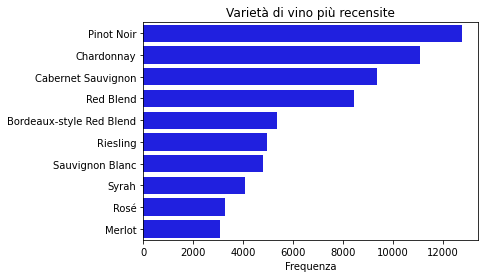

In [18]:
# Conteggio delle varietà di vino presenti nel df
# Grafico a barre per evidenziare le 10 varietà di vino più recensite

print('Numero totale delle varietà di vino:', df['variety'].nunique())

var_variety = df['variety'].value_counts().to_frame().head(10)

sns.barplot(x = var_variety['variety'], y = var_variety.index, data = var_variety, color = 'blue')
plt.title('Varietà di vino più recensite')
plt.xlabel('Frequenza')
plt.show()

<p> Da questo risultato possiamo notare che ci sono molte varietà differenti di vino (691), ma che ce ne sono alcune che emergono in modo particolare, in quanto estremamente ricorrenti nella distribuzione. Di conseguenza, i vini che andremo a selezionare per il nostro marketplace saranno principalmente di queste varietà, essendo le più gettonate. </p>

Numero totale delle cantine analizzate: 15843


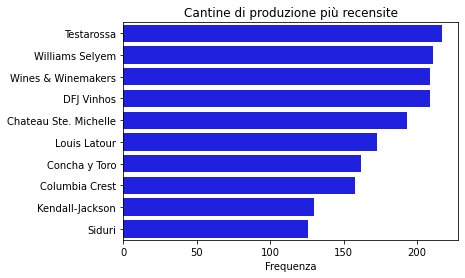

In [19]:
# Conteggio delle cantine di produzione di vino presenti nel df
# Grafico a barre per evidenziare le 10 cantine di produzione più recensite

print('Numero totale delle cantine analizzate:', df['winery'].nunique())

var_winery = df['winery'].value_counts().to_frame().head(10)

sns.barplot(x = var_winery['winery'], y = var_winery.index, data = var_winery, color = 'blue')
plt.title('Cantine di produzione più recensite')
plt.xlabel('Frequenza')
plt.show()

<p> In questo caso abbiamo un numero estremamente ampio di cantine di produzione: ben 15843 analizzate, pertanto la distribuzione risulterà più uniforme rispetto alla precedente. Dunque, non inserirei questa caratteristica come discriminante nel processo di selezione dei vini. </p>

<h1> 3. Analisi delle variabili correlate tra loro: </h1>
<p> In questa fase, andremo a correlare le variabili in esame. In particolar modo, verificheremo le seguenti relazioni: 
    <ul>
        <li> Prezzo dei vini e il loro punteggio </li>
        <li> Paese di provenienza e il punteggio dei vini </li>
        <li> Paesi più recensiti e la media dei loro punteggi </li>
    </ul>
</p>

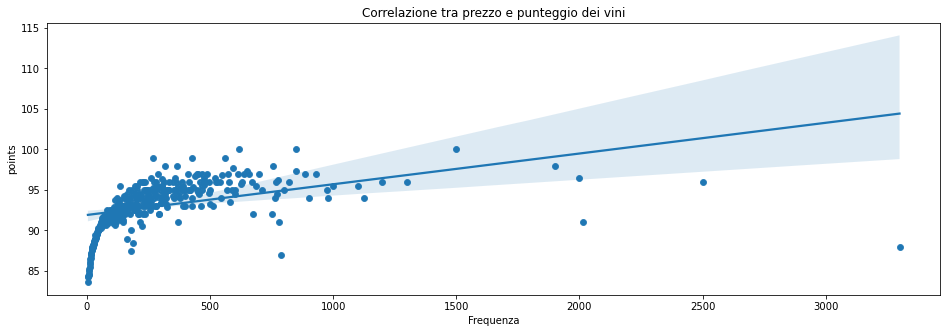

In [20]:
# Grafico di dispersione in cui emerge la correlazione tra prezzo e punteggio

corr_price_points = df.groupby('price').points.mean().to_frame()

plt.figure(figsize = (16, 5))
sns.scatterplot(x = corr_price_points.index, y = corr_price_points['points'], data = corr_price_points)
sns.regplot(x = corr_price_points.index, y = corr_price_points['points'], data = corr_price_points)
plt.title('Correlazione tra prezzo e punteggio dei vini')
plt.xlabel('Frequenza')
plt.show()

<p> Intuitivamente avrei pensato che i vini con un prezzo più alto avrebbero ottenuto valutazioni più alte; tuttavia, dal grafico emerge che non sia proprio così. Infatti, è evidente che all'aumentare del prezzo corrisponda un amuento proporzionale dei punteggi solo per la primissima parte della distribuzione, mentre successivamente (nella maggior parte delle osservazioni) la correlazione diventa via via più debole. Infatti, la retta di regressione mostra un trend positivo, ma con una varianza crescente. </p>
<p> Inoltre, emerge in modo chiaro la presenza di molti outlier, il più evidente risulta essere quel vino che ha un prezzo decisamente alto (superiore ai 3000), ma con una valutazione tutt'altro che alta, al pari di altri vini che hanno un prezzo molto più esiguo; quindi, si tratta di un'osservazione non in linea con le altre. </p>

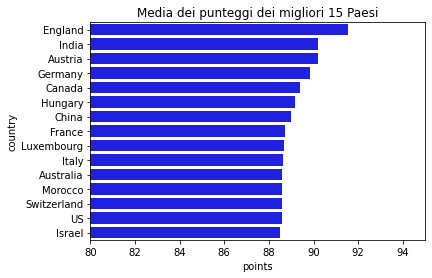

In [21]:
# Grafico a barre in cui emerge la media delle votazioni per i migliori 15 Paesi

corr_country_points = df.groupby(['country'])['points'].mean().sort_values(ascending = False).to_frame().head(15)

sns.barplot(x = corr_country_points['points'], y = corr_country_points.index, data = corr_country_points, color = 'blue')
plt.xlim(80, 95)
plt.title('Media dei punteggi dei migliori 15 Paesi')
plt.show()

<p> Da questo grafico troviamo i Paesi con i punteggi medi più alti. </p>
<p> Questa informazione, come anticipato, la andremo a mettere a sistema nella prossima cella con il df in cui ci sono i maggiori produttori di vino, al fine di individuare quei Paesi che abbiano un gran numero di vini prodotti e che allo stesso tempo abbiano un punteggio medio superiore a quello generale.</p>

In [22]:
# Formattazione del Dataframe 'var_country' per poterlo unire a 'corr_country_points'

var_country.rename(columns = {'country':'Frequencies'}, inplace = True)
var_country.index.names = ['country']

In [23]:
# Unione dei due df 'var_country' e 'corr_country_points'

pd.merge(left = var_country, right = corr_country_points, on = 'country').sort_values(by = 'Frequencies', ascending = False)

,Frequencies,points
country,,
US,54265,88.566387
France,17776,88.734867
Italy,16914,88.618186
Austria,2799,90.190782
Australia,2294,88.595466
Germany,2120,89.836321
Israel,489,88.496933
Canada,254,89.377953


<p> Con l'unione di questi due df vengono evidenziati i Paesi che producono più vino tra tutti e allo stesso tempo che abbiamo 
una media di valutazioni relativamente alta, in quanto superiore alla media generale. </p>
<p> In particolare, a conclusione di questa fase, il focus della scelta dei vini si baserà sui primi tre risultati (US, Francia e Italia), in modo da garantire un'offerta più in linea con i gusti delle persone. In quanto questi Paesi sono stati scelti unendo: quantità, in quanto sono i maggiori produttori di vino e qualità, poichè il loro punteggio medio è superiore a quello generale. </p>

<h1> 4. Strategia per selezionare i vini da inserire nel marketplace: </h1>
<p> 
Dopo le osservazioni effettuate nella precedente fase, ho deciso di porre il focus della strategia per la selezione dei vini per il marketplace su: 
    <ol>
        <li> Paesi di provenienza più recensiti con il punteggio medio più alto (US, Francia e Italia) </li>
        <li> Punteggi molti alti (> 96) </li>
        <li> Varietà di vino più amate (le migliori 5 nei Paesi scelti, che troveremo nelle prossime celle) </li>
    </ol>
L'obiettivo finale è quello di garantire ai clienti un'offerta molto ampia (in termini di provenienza, prezzo e varietà) e di altissima qualità (selezionando i vini valutati con punteggi molto alti).
</p>

In [24]:
# Creazione della lista dove inseriremo i df con i vini scelti, al fine di concatenarli e ottenere un unico df

frame = []

<h2><em> Selezione dei vini statunitensi: </em></h2>

In [25]:
# Creazione df con i vini provenienti dagli States che abbiano una valutazione molto alta

top_wine_us = df.query("country == 'US' & points > 96")

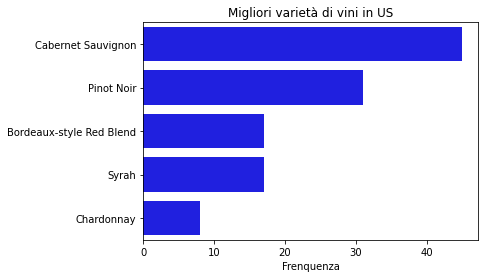

In [26]:
# Visualizzazione delle 5 varietà più consumate in US

top_variety_us = top_wine_us['variety'].value_counts().to_frame().head(5)

sns.barplot(x = top_variety_us['variety'], y = top_variety_us.index, data = top_variety_us, color = 'blue')
plt.title('Migliori varietà di vini in US')
plt.xlabel('Frenquenza')
plt.show()

In [27]:
# Selezione dei migliori vini statunitensi che rientrano tra le 5 varietà più consumate
# Inserimento del df nella lista frame

top_us = top_wine_us[top_wine_us['variety'].isin(['Cabernet Sauvignon', 'Pinot Noir', 'Bordeaux-style Red Blend', 'Syrah', 'Chardonnay'])]

frame.append(top_us)

<p> Abbiamo così selezionato i vini prodotti negli States, recensiti con un punteggio eccellente e che appartengano alle varietà più amate. </p> 
<p> Procediamo allo stesso modo nella selezione dei vini francesi ed italiani. </p> 

<h2><em> Selezione dei vini francesi: </em></h2>

In [28]:
# Creazione df con i vini provenienti dalla Francia che abbiano una valutazione molto alta

top_wine_fr = df.query("country == 'France' & points > 96")

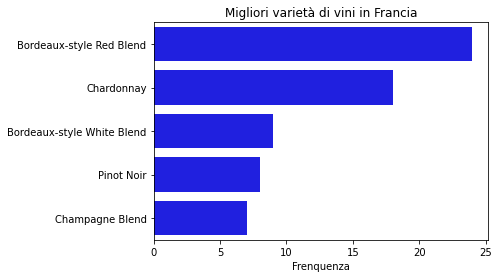

In [29]:
# Visualizzazione delle 5 varietà più consumate in Francia

top_variety_fr = top_wine_fr['variety'].value_counts().to_frame().head(5)

sns.barplot(x = top_variety_fr['variety'], y = top_variety_fr.index, data = top_variety_fr, color = 'blue')
plt.title('Migliori varietà di vini in Francia')
plt.xlabel('Frenquenza')
plt.show()

In [30]:
# Selezione dei migliori vini francesi che rientrano tra le 5 varietà più consumate
# Inserimento del df nella lista frame

top_fr = top_wine_fr[top_wine_fr['variety'].isin(['Bordeaux-style Red Blend', 'Chardonnay', 'Bordeaux-style White Blend', 'Pinot Noir', 'Champagne Blend'])]

frame.append(top_fr)

<h2><em> Selezione dei vini italiani: </em></h2>

In [31]:
# Creazione df con i vini provenienti dall'Italia che abbiano una valutazione molto alta

top_wine_it = df.query("country == 'Italy' & points > 96")

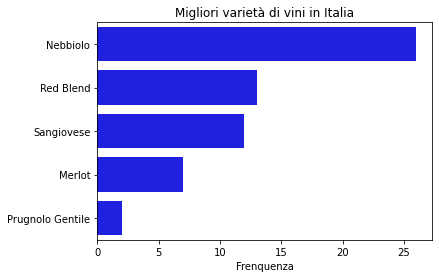

In [32]:
# Visualizzazione delle 5 varietà più consumate in Italia

top_variety_it = top_wine_it['variety'].value_counts().to_frame().head(5)

sns.barplot(x = top_variety_it['variety'], y = top_variety_it.index, data = top_variety_it, color = 'blue')
plt.title('Migliori varietà di vini in Italia')
plt.xlabel('Frenquenza')
plt.show()

In [33]:
# Selezione dei migliori vini italiani che rientrano tra le 5 varietà più consumate
# Inserimento del df nella lista frame

top_it = top_wine_it[top_wine_it['variety'].isin(['Nebbiolo', 'Red Blend', 'Sangiovese', 'Merlot', 'Prugnolo Gentile'])]

frame.append(top_it)

In [34]:
# Unire dei 3 df con i vini selezionati 

new_df = pd.concat(frame)

In [35]:
# Visualizzazione del nuovo df contenente tutti i vini selezionati per il marketplace

new_df.sort_values(by = 'price')

,country,description,points,price,title,variety,winery
114981,US,A seriously top of the heap California Syrah. ...,97,35.0,Donkey & Goat 2010 Fenaughty Vineyard Syrah (E...,Syrah,Donkey & Goat
118059,US,"Shows classic, full-throttle notes of tropical...",99,44.0,Failla 2010 Estate Vineyard Chardonnay (Sonoma...,Chardonnay,Failla
45986,France,"Powered by intense botrytis, this wine is opul...",97,45.0,Château Coutet 2014 Barsac,Bordeaux-style White Blend,Château Coutet
1560,US,"A stunning Pirouette—63% Cabernet Sauvignon, 2...",98,50.0,Pirouette 2008 Red Wine Red (Columbia Valley (...,Bordeaux-style Red Blend,Pirouette
47432,US,This wine shows real first-growth quality in i...,97,50.0,Williams Selyem 2010 Allen Vineyard Chardonnay...,Chardonnay,Williams Selyem
...,...,...,...,...,...,...,...
1566,France,"Such a generous and ripe wine, with a dark cor...",97,1100.0,Château La Mission Haut-Brion 2009 Pessac-Léo...,Bordeaux-style Red Blend,Château La Mission Haut-Brion
111753,France,"Almost black in color, this stunning wine is g...",100,1500.0,Château Lafite Rothschild 2010 Pauillac,Bordeaux-style Red Blend,Château Lafite Rothschild
111755,France,This is the finest Cheval Blanc for many years...,100,1500.0,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend,Château Cheval Blanc
1558,France,"A massive wine for Margaux, packed with tannin...",98,1900.0,Château Margaux 2009 Margaux,Bordeaux-style Red Blend,Château Margaux


<p> Si tratta di una selezione mirata a offrire un'ampia scelta ai clienti in termini di varietà e di provenienza dei vini. L'obiettivo è quello di dargli la possibilità di scegliere sulla base delle loro preferenze e garantirgli un prodotto di ottima qualità con valutazioni eccellenti su diverse fasce di prezzo. </p>
<p> Il nostro target di clientela avrà un budget alto, in quanto: i prezzi dei vini selezionati risultano avere un range piuttosto ampio, a partire da 35, ovvero un prezzo superiore al valore medio dell'intera distribuzione (20), fino ad arrivare a prezzi molto elevati (2000). </p>

In [36]:
# Df modificato per avere le descrizioni scritte per esteso

pd.set_option("display.max_rows", 259)
pd.set_option("max_colwidth", 700)
new_df_description = new_df[['title','variety', 'winery','description', 'price']].set_index("title").sort_values('price')
new_df_description

,variety,winery,description,price
title,,,,
Donkey & Goat 2010 Fenaughty Vineyard Syrah (El Dorado),Syrah,Donkey & Goat,"A seriously top of the heap California Syrah. This complex, interesting wine sings of black pepper and garrigue, fleshy in just-ripe cherry, leather and dark plum. From the mountainous Fenaughty Vineyard, always a good source, it finishes long and will age gorgeously if you can possibly wait to drink it; that pepper will mellow in interesting ways.",35.0
Failla 2010 Estate Vineyard Chardonnay (Sonoma Coast),Chardonnay,Failla,"Shows classic, full-throttle notes of tropical and citrus fruits, pears and sweet green apples, combined with strong minerality and complex layers of buttered toast, honey and creamy lees. The description alone hardly does justice to the wine's beauty. The acidity is perfect, the oak deftly applied, the finish long and completely satisfying. Winemaker Ehren Jordan suggests pairing it with simple fare like roast chicken and salted fingerling potatoes.",44.0
Château Coutet 2014 Barsac,Bordeaux-style White Blend,Château Coutet,"Powered by intense botrytis, this wine is opulent and ripe, with spice, yellow fruit and honey flavors. It has just the right balance of acidity to maintain its shape and proportions. It's likely to age well over many years. Drink from 2024.",45.0
Pirouette 2008 Red Wine Red (Columbia Valley (WA)),Bordeaux-style Red Blend,Pirouette,"A stunning Pirouette—63% Cabernet Sauvignon, 22% Merlot, 9% Cab Franc and 6% Petit Verdot. Full and magnificently rich, it is loaded with dense and thrilling fruit flavors of black cherry and cassis. A streak of iron and a hint of citrus keep the wine evolving through a long, beautifully balanced finish. Retasted after being open for 24 hours, the wine was as fresh and thrilling as on the first day.",50.0
Williams Selyem 2010 Allen Vineyard Chardonnay (Russian River Valley),Chardonnay,Williams Selyem,"This wine shows real first-growth quality in its intensity and concentration, with orange nectar, golden mango, pear, peach pie, buttercream, vanilla, buttered toast and spice flavors. The balance is exquisite, and the way the acids dance along the palate make the wine clean and lively.",50.0
Dutton-Goldfield 2010 Dutton Ranch Rued Vineyard Chardonnay (Green Valley),Chardonnay,Dutton-Goldfield,"The cold and fog actually helped this Chardonnay, which achieves a remarkable delicacy and tartness despite the power of its fruit. Really remarkable for the flood of golden mango, Asian pear and Key lime pie richness, which is grounded by a firm minerality. Oak influence and aging on the lees lend the perfect touches of smoky, buttered toast and zesty creaminess to this dry, polished wine. A mere 587 cases were produced.",50.0
Trefethen 2005 Estate Cabernet Sauvignon (Oak Knoll District),Cabernet Sauvignon,Trefethen,"A monumental Cabernet that succeeds on every level. It's deep, dark and ultrarich, showing massive blackberries, black currants, dark chocolate, violets, minerals and a touch of sweet, smoky oak. Beyond the flavors is the dramatic structure, with fabulously ripe, dense tannins and a bone-dry, long finish. Surely a tremendous wine capable of long-term aging. Try 2012–2018, at least.",50.0
Joseph Swan Vineyards 2007 Trenton Estate Vineyard Pinot Noir (Russian River Valley),Pinot Noir,Joseph Swan Vineyards,"An awesome Pinot Noir—it's hard to find words to describe its beauty. It's bone dry and rich in stimulating acidity, and the cherry and raspberry fruit flavors have an earthy, mushroomy quality that grounds the wine and gives it a real sense of terroir. Shows the fleshy attractions of the amazing '07 vintage, with an undisputed capacity to age. Now–2017, at least.",52.0
Arista 2005 Ferrington Vineyard Pinot Noir (Anderson Valley),Pinot Noir,Arista,"Showing the superb structure of the vintage and the spectacular way this great vineyard can ripen Pinot Noir, this polished wine is not only delicious from the get-go, but ageable. Floods the

<p> Infine, ho deciso di realizzare questo df, in cui vengono mostrate le recensioni dei vini scritte per esteso. In questo modo potremo utilizzarle per descrivere le caratteristiche principali dei vini selezionati nel copy delle pagine di vendita del marketplace. </p>

<h1><center><font color = "blue"> Grazie per l'attenzione! </font></center></h1>
<h3><center><font color = "blue"> Sara Panarisi </font></center></h3>